In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
breastCancer = datasets.load_breast_cancer()
X = breastCancer.data
y = breastCancer.target
print("Feature/Input: ", breastCancer.feature_names,"\n")
print("Target/Output: ", breastCancer.target_names,"\n")
print("Feature/Input Data: ",X,"\n")
print("Target/Output Data: ",y)

Feature/Input:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Target/Output:  ['malignant' 'benign'] 

Feature/Input Data:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.7

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2001)
print("Training Targets: ",y_train,"\n")
print("Testing Targets: ",y_test)

Training Targets:  [0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 0] 

Testing Targets:  [1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 

In [4]:
knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : [3,5,7,9,11],
    'weights' : ['uniform', 'distance'],
    'p': [1,2]
}

In [5]:
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best Model: ", best_model)

Best Hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Model:  KNeighborsClassifier(n_neighbors=11, p=1)


In [6]:
y_pred = best_model.predict(X_test)
print("Predicted Output: ", y_pred, "\n")
print("Actual Output: ",y_train, "\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Predicted Output:  [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 1 0] 

Actual Output:  [0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 

In [7]:
patientData = [
    17.1, 20.2, 120.5, 1102.0, 0.097, 0.132, 0.198, 0.071, 0.181, 0.056,
    0.5, 1.1, 3.2, 45.5, 0.006, 0.02, 0.03, 0.009, 0.01, 0.002,
    25.5, 30.3, 165.0, 2019.0, 0.144, 0.34, 0.45, 0.142, 0.25, 0.08
]

patientData = np.array(patientData).reshape(1, -1)

pred = best_model.predict(patientData)
print(pred)

if pred == 0:
    print("Patient has Cancer malignant tumor")
else:
    print("Patient has No Cancer benign tumor")


[0]
Patient has Cancer malignant tumor


In [8]:
report = classification_report(y_test, y_pred, target_names = breastCancer.target_names)
print("Classification Report: ")
print(report)
print(y_test)
print(y_pred)

Classification Report: 
              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        49
      benign       0.90      0.97      0.93        65

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

[1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 1 0]
[1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 1 1 0]


Classification Report: 
              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        49
      benign       0.90      0.97      0.93        65

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



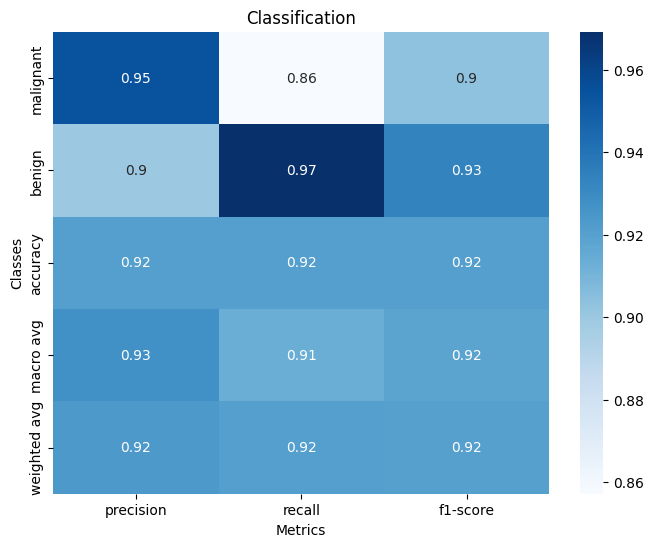

In [9]:
import pandas as pd
report = classification_report(y_test, y_pred, target_names = breastCancer.target_names)
print("Classification Report: ")
print(report)

plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, target_names = breastCancer.target_names, output_dict = True)).iloc[:-1,:].T, annot = True, cmap = 'Blues')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification')
plt.show()